The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



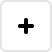
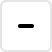
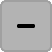
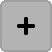
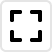
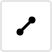
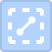

In [1]:
import numpy as np
import pandas as pd

from lets_plot.geo_data import *
from lets_plot import *

LetsPlot.setup_html()

In [2]:
LetsPlot.set(maptiles_zxy(url='https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}@2x.png'))

In [3]:
airports = pd.read_csv ("../data/airports.csv")
df = pd.read_csv('../data/country_capital.csv')

In [4]:
two_countries_df = df.loc[df['Country'].isin(['Greece', 'Turkey'])]
two_countries = regions_country(two_countries_df['Country']).boundaries(resolution='country')

In [5]:
ggplot() + geom_livemap() + theme(legend_position='none') \
+ geom_polygon(aes(fill='request'), data= two_countries, alpha=0.3, tooltips="none")\
+ geom_point(aes(x='longitude', y='latitude', fill='color', size=airports['passengers']), \
             data = airports, shape=21,\
                         tooltips=layer_tooltips()
                           .format('passengers', '{.1f} m' )
                           .line('@|@IATA')
                           .line('Passengers|@passengers') 
                           .line('City|@city') 
                           .line('Country|@country') 
                           .line('Longitude|$x')
                           .line('Latitude|$y')) + scale_size(trans='sqrt')